In [25]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
DATA_PATH = "../data/raw/"
speakers = os.listdir(DATA_PATH)

In [3]:
emotions_mapping = {
    0 : "Angry",
    1 : "Neutral",
    2 : "Happy",
    3 : "Fear",
    4 : "Sad"
}

In [4]:
def plot_random_file(emotions_map, n_mfcc=12):
    """
    Function slect random actor with all 5 emotions recorded.
    Then plot random audio file for each emotion for given actor.

    Args:
        emotions_map (dict): emotions mapping
        n_mfcc (int): number of mfccs
    """
    while True:
        speaker = random.choice(speakers)
        speaker_path = os.path.join(DATA_PATH, speaker)
        
        #Find actor with all 5 emotions
        if len(os.listdir(speaker_path)) == 5:
            fig, axes = plt.subplots(2, 5, figsize=(20, 8))
            
            for i in range(5):
                file_path = os.path.join(speaker_path, f"{i}")
                file_names = os.listdir(file_path)
                
                y, sr = librosa.load(os.path.join(file_path, random.choice(file_names)))
                
                # Plot waveplot
                axes[0, i].set_title(f"Emotion: {emotions_map[i]}")
                librosa.display.waveshow(y, sr=sr, axis='time', color='purple', offset=0.0, ax=axes[0, i])
                axes[0, i].set_ylim(-1.1, 1.1)
                
                # Plot MFCC
                mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
                librosa.display.specshow(mfccs, sr=sr, ax=axes[1, i], cmap='viridis', x_axis='time')
                axes[1, i].set_title(f"MFCC: {emotions_map[i]}")
            
            plt.tight_layout()
            plt.show()
            break

Speaker 1


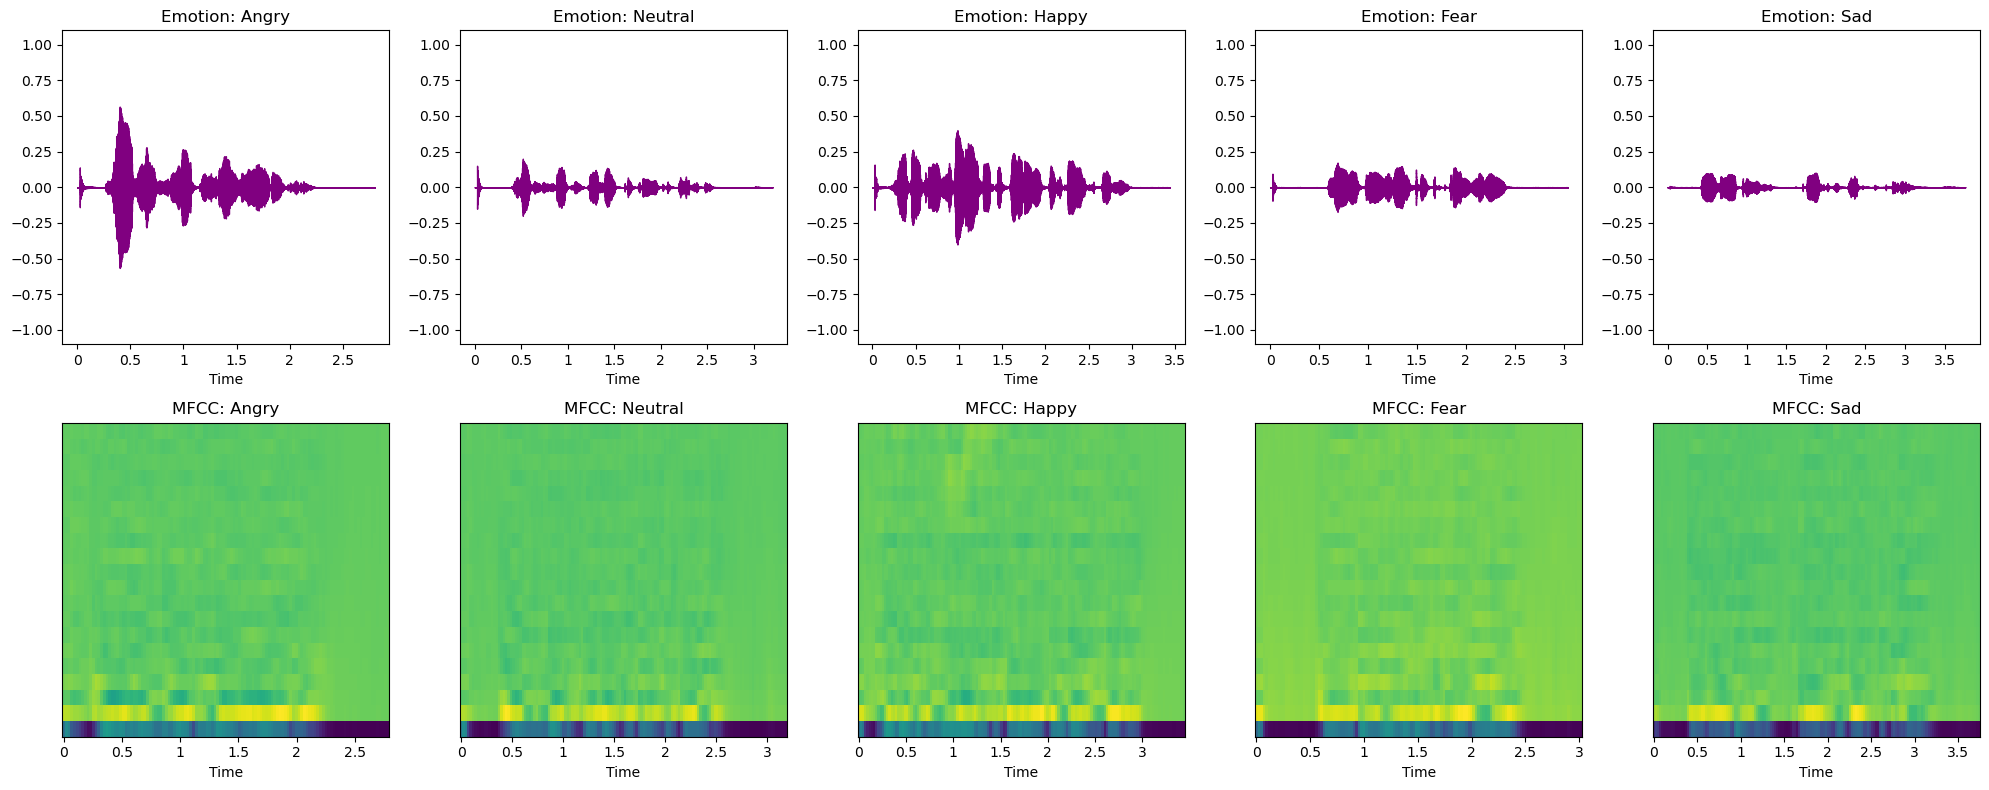

Speaker 2


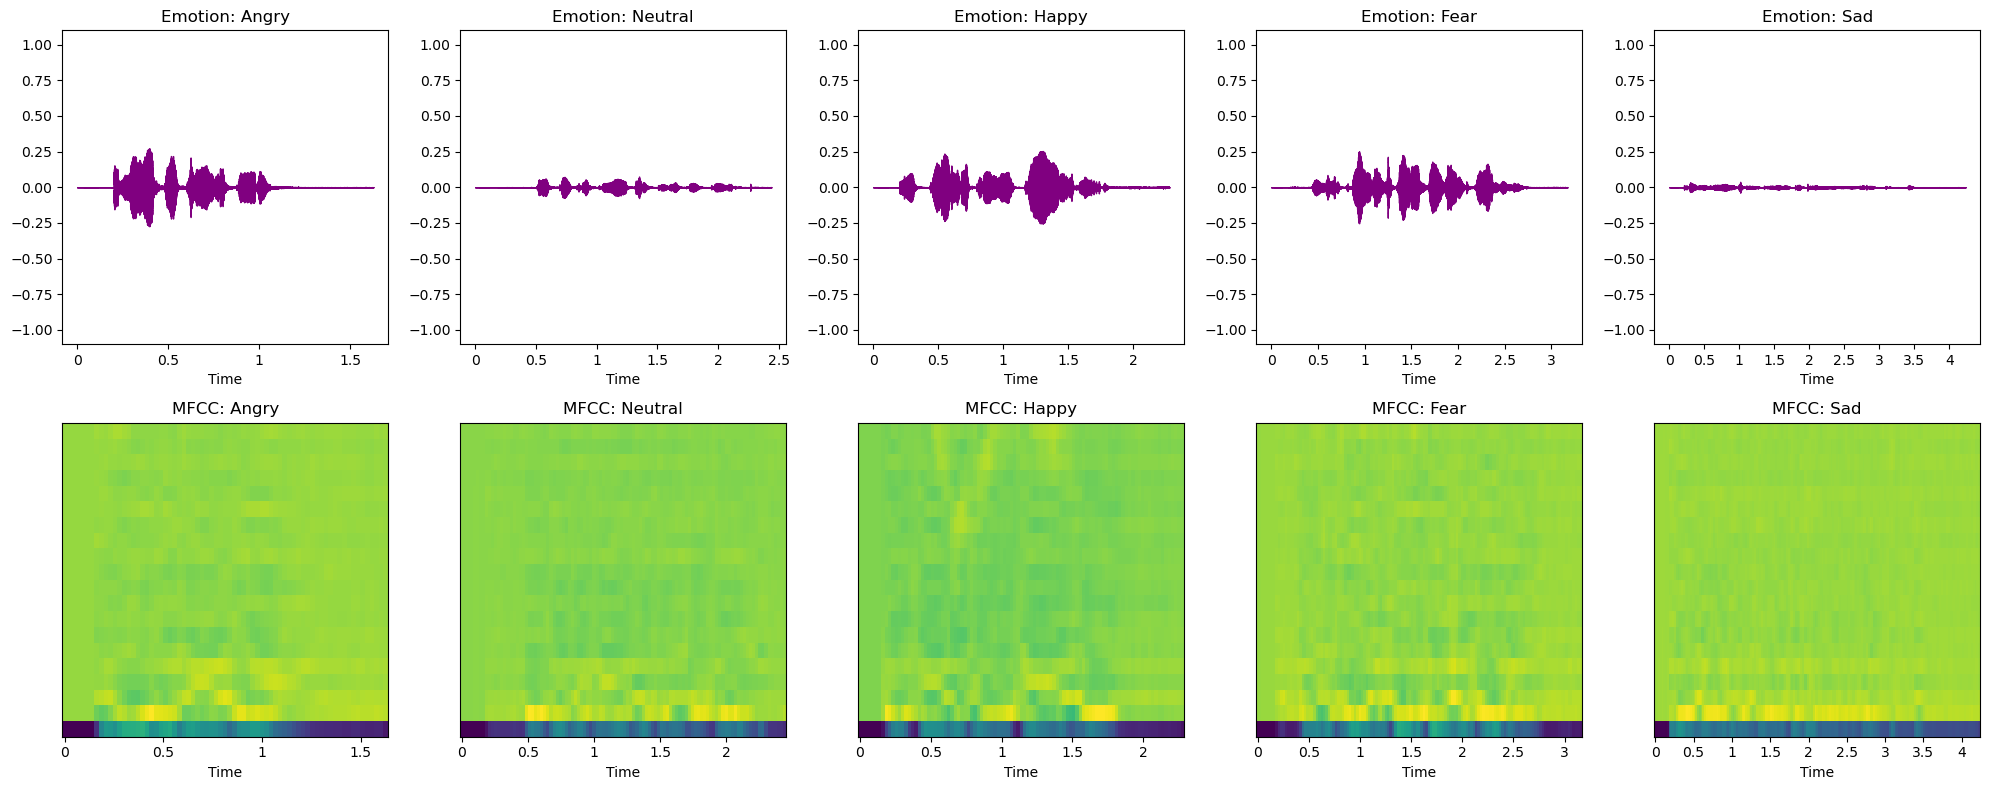

Speaker 3


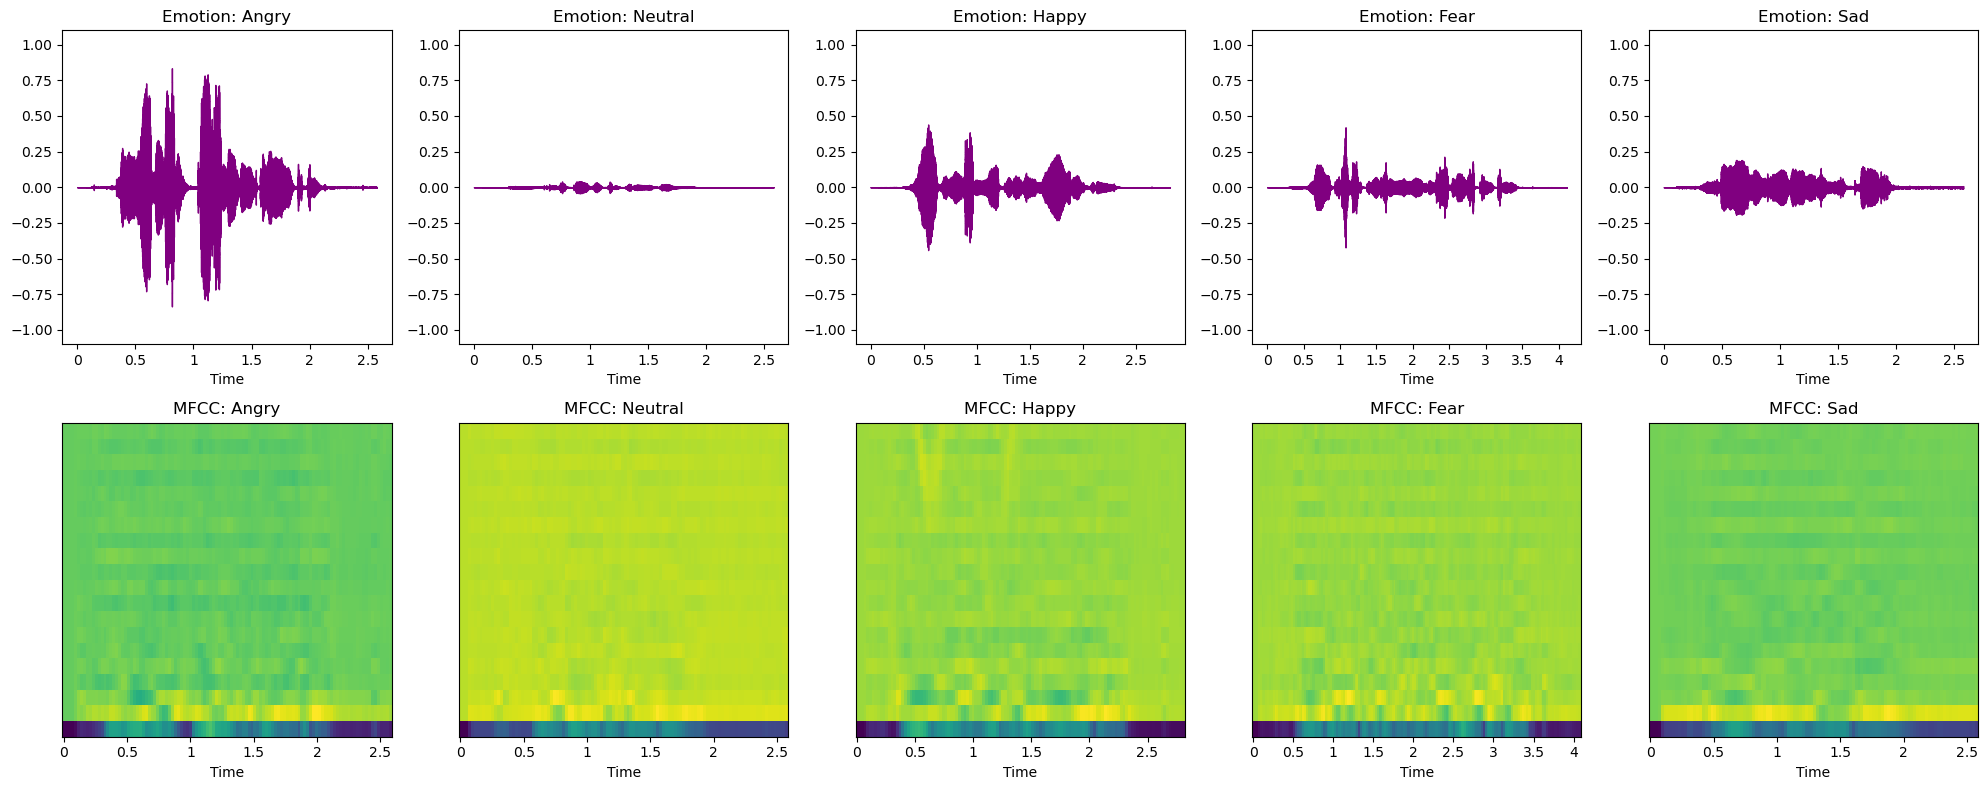

In [9]:
for i in range(3):
    print(f"Speaker {i+1}")
    plot_random_file(emotions_mapping, n_mfcc=20)

In [10]:
df = pd.read_csv("../data/processed/full_dataset.csv")

In [11]:
df.head()

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,speaker_id,target
0,0.000021,0.0,0.000021,111.0,0.0,0.000002,-1.045582e-08,0.000004,0.000002,1.202625e-11,...,1.321312,10.456679,-0.487711,0.0,1.054367,0.487711,1.054367,1.542078,4.0,0.0
1,0.000025,0.0,0.000025,120.0,0.0,0.000001,-4.585941e-09,0.000002,0.000002,1.220282e-11,...,1.899939,11.069414,0.000000,0.0,1.739636,0.000000,1.739636,1.739636,4.0,0.0
2,0.000025,0.0,0.000025,81.0,0.0,0.000001,-1.165122e-08,0.000003,0.000002,9.326820e-12,...,1.381225,8.270788,0.000000,0.0,3.440742,0.000000,3.440742,3.440742,4.0,0.0
3,0.000020,0.0,0.000020,178.0,0.0,0.000002,-5.940128e-09,0.000003,0.000002,8.860856e-12,...,2.504269,15.782689,-0.922710,0.0,1.376041,0.922710,1.376041,2.298752,4.0,0.0
4,0.000022,0.0,0.000022,148.0,0.0,0.000001,-3.790123e-09,0.000002,0.000002,7.097452e-12,...,1.544040,9.495741,-0.819962,0.0,1.776521,0.819962,1.776521,2.596483,4.0,0.0


In [12]:
df.shape

(7601, 990)

In [13]:
df.dropna(inplace=True)
df.shape

(7601, 990)

In [14]:
for dtype in df.dtypes:
    if not pd.api.types.is_numeric_dtype(dtype):
        print("Not all columns are numeric.")
        break
else:
    print("All columns are numeric.")

All columns are numeric.


In [15]:
X = df.drop(columns=['target', 'speaker_id'])
y = df["target"]

In [16]:
X.shape

(7601, 988)

In [20]:
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(n_components=2)

# Fit and transform on training data
X_pca = pca.fit_transform(X)

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Instantiate LDA
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit and transform on training data
X_lda = lda.fit_transform(X, y)

In [22]:
def plot_data(X, y, title, alpha=0.5):
    plt.figure(figsize=(8, 6))
    unique_classes = np.sort(np.unique(y))[::-1]

    for c in unique_classes:
        plt.scatter(X[y == c, 0], X[y == c, 1], label=f'{emotions_mapping[c]}', alpha=alpha)

    plt.title(title)
    plt.legend()
    plt.show()

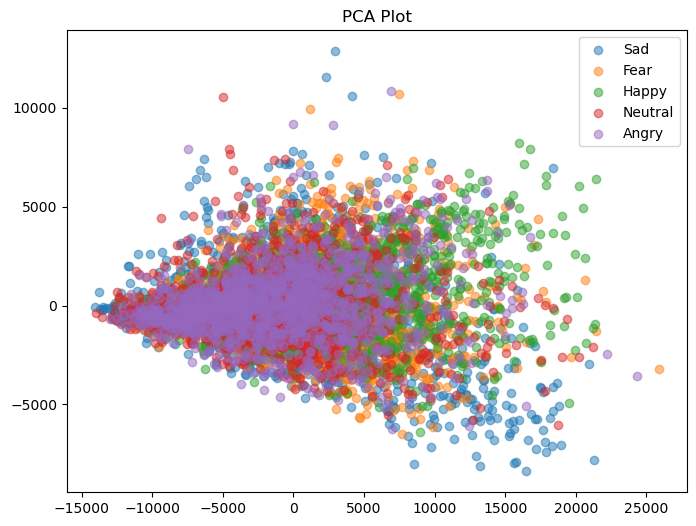

In [23]:
# Plot PCA
plot_data(X_pca, y, title='PCA Plot')

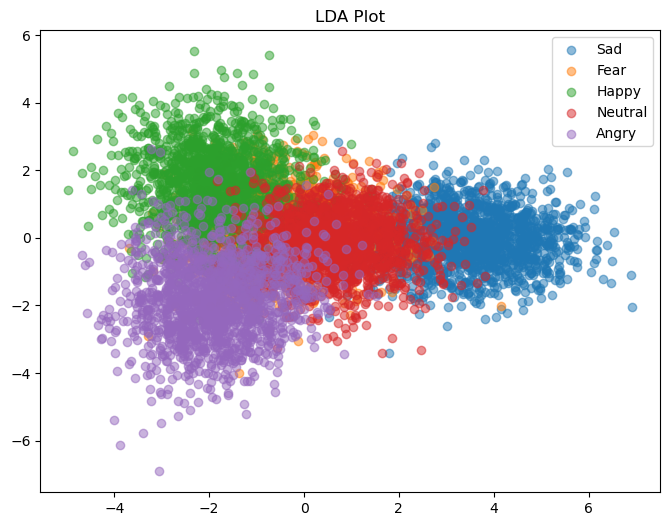

In [24]:
# Plot LDA
plot_data(X_lda, y, title='LDA Plot')